In [173]:
%pip install numpy scikit-learn requests matplotlib.pyplot seaborn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [174]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [175]:
#this code is to parse violation time column i tried using the data as is but I couldnt see any pattern on the scatterplot. Since time move from morning (AM) to Night (PM) i think it would be best to parse and sort the violation time data; hopefully it gives us a better visualization 
def parse_violation_time(time_str):
    '''Handles parsing time(AM/PM)'''
    try:
        if time_str[-1] == 'A':
            new_time_str=time_str + 'M'
            return datetime.strptime(new_time_str, '%I%M%p')
        elif time_str[-1] == 'P':
            new_time_str=time_str + 'M'
            if time_str[:2] <= '12':
                return datetime.strptime(new_time_str, '%I%M%p')
            else:
                return datetime.strptime(new_time_str, '%I%M%p')
        elif len(time_str) == 4:
            return datetime.strptime(new_time_str, '%H%M')
        else:
            return pd.NaT
    except ValueError:
        return pd.NaT

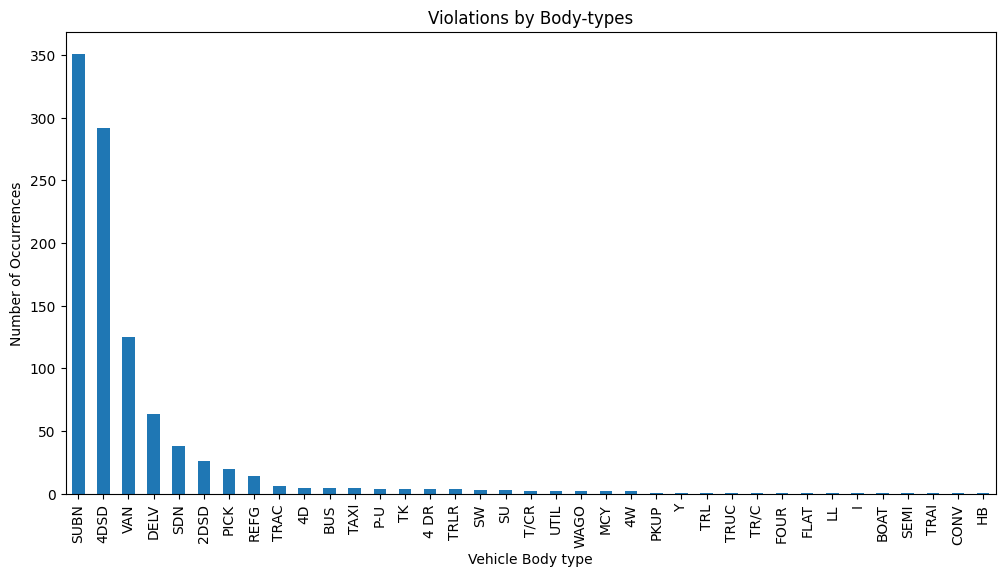

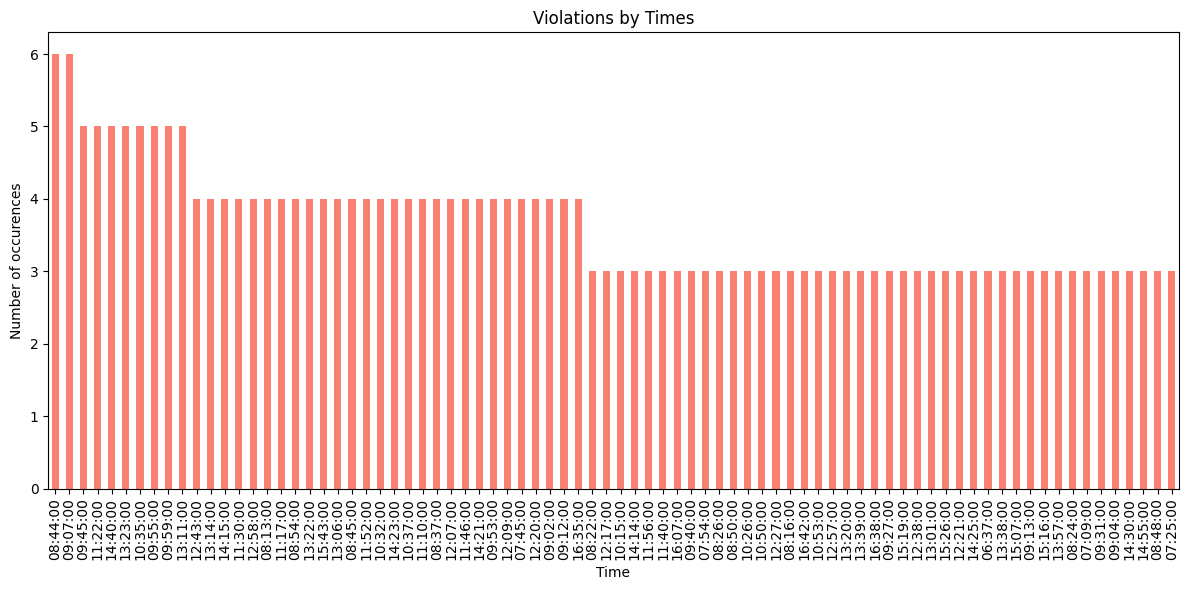

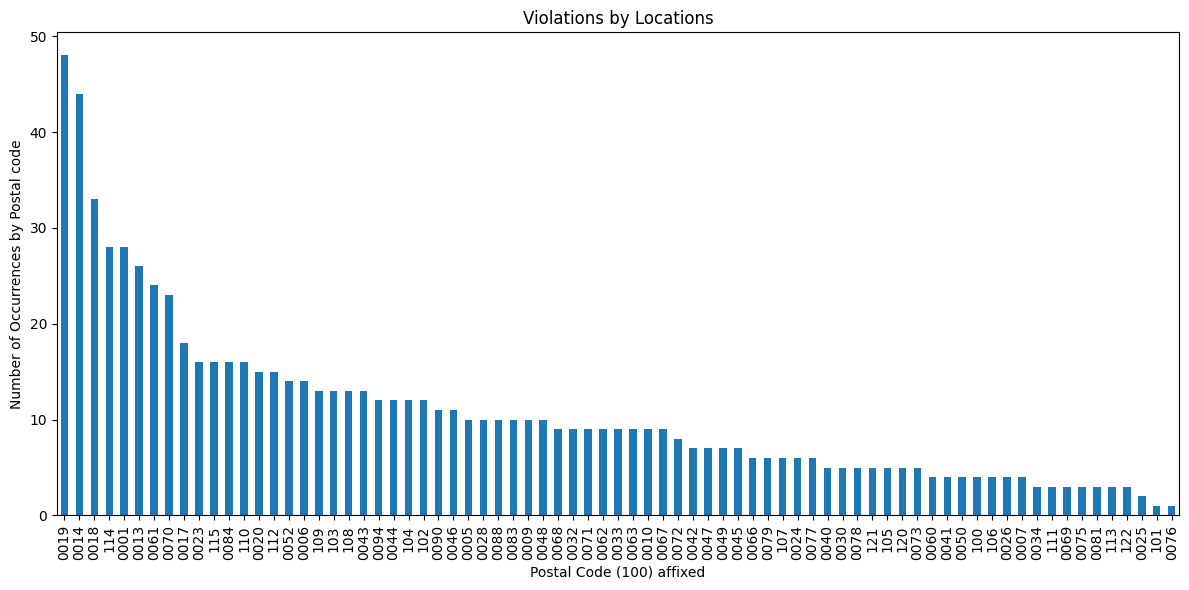

In [176]:

response= requests.get("https://data.cityofnewyork.us/resource/2bnn-yakx.json")
response_json= response.json()
df = pd.DataFrame(response_json)

#--------------------------Nahallah Champagne: Data Collection and Preprocessing--------------------#

#Load dataset into DataFrame
#vehicle_df = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2024_20240415.csv')

#Drop these columns from the Vehicle Collisions Dataset. Since most of the cells in these columns are empty or not relevent. 
df = df.drop('date_first_observed', axis=1) #axis 1 = colunms
df = df.drop('sub_division', axis=1) 
df = df.drop('intersecting_street', axis=1)
#df = df.drop('double_parking_violation', axis=1)
# df = df.drop('hydrant_violation', axis=1)                     # I ran on my end it said that it didnt exist so i commented off to run the code
# df = df.drop('no_standing_or_stopping_violation', axis=1)
# df = df.drop('violation_description', axis=1)

#I want to stort the data in some way, sorting it in decsending order by year seems like a good idea. 
df = df.sort_values(by='issue_date', ascending=False)

#Display the first 5 rows of the specific rows
df.head()
#----------------------------------------------------------------------------------------------------#

#describe data 
# df['vehicle_body_type'].describe(include='all')
# df['from_hours_in_effect'].describe(include='all')
df.describe(include='all') 
plt.figure(figsize=(12,6))
vehicle_counts=df['vehicle_body_type'].value_counts()
vehicle_counts.plot(kind='bar')
plt.title("Violations by Body-types")
plt.xlabel('Vehicle Body type')
plt.ylabel("Number of Occurrences")


#using the time parser on violation times (this is for the scatter plot, may not be nessary for visuals we already have a bar and histogram but maybe for Training)
df['violation_time']= df['violation_time'].apply(parse_violation_time)
df['violation_time'] = df['violation_time'].dt.time 
#getting a slice of times and their counts
top_times= df['violation_time'].value_counts().head(80)
plt.figure(figsize=(12,6))
top_times.plot(kind='bar', color='salmon')
plt.title("Violations by Times")
plt.xlabel("Time")
plt.ylabel("Number of occurences")
plt.tight_layout()
plt.show()

#VIOLATION LOCATION GRAPH
plt.figure(figsize=(12,6))
violation_location=df['violation_location'].value_counts() 
violation_location.plot(kind='bar')
plt.title("Violations by Locations")
plt.xlabel('Postal Code (100) affixed')
plt.ylabel("Number of Occurrences by Postal code")  
plt.tight_layout()
plt.show()

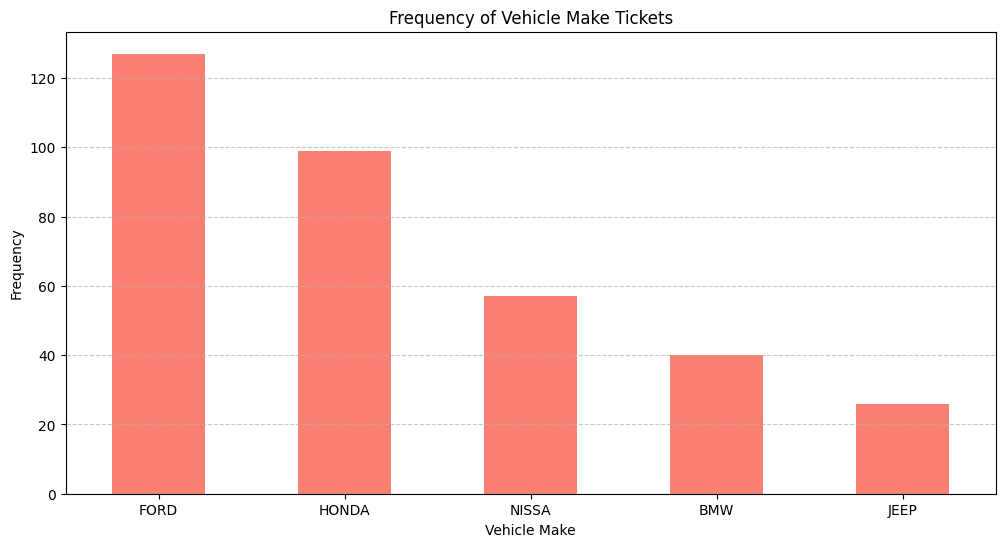

In [177]:
#--------------------------Nahallah Champagne: Data Visualization-----------------------------------#
'''
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt
'''
#------Histogram-----

# Specific vehicle makes for the histogram
specific_vehicles = ['NISSAN', 'HONDA', 'NISSA', 'JEEP', 'BMW', 'FORD', 'LEX']

# Only include rows that have vehicle_make column filled
specific_vehicle_df = df[df['vehicle_make'].isin(specific_vehicles)]

# Plot histogram for vehicle make
plt.figure(figsize=(12, 6))
specific_vehicle_df['vehicle_make'].value_counts().plot(kind='bar', color='salmon')

# Plot data in box chart
plt.title('Frequency of Vehicle Make Tickets')
plt.xlabel('Vehicle Make')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show() 

#---------------------------------------------------------------------------------------


In [178]:
# Assuming 'column_name' is the name of the column you're interested in
unique_counties = df['violation_county'].dropna().unique() # i removed nan's cuz i noticed nan skewed the data

# Print the result
print("Number of unique county:", unique_counties)

Number of unique county: ['Q' 'NY' 'K' 'QN' 'BX' 'ST' 'BK' 'R' 'MN']


In [179]:
# Assuming 'column_name' is the name of the column you're interested in
# COnverting vehicle year to int cuz some ML cannot handle strings
df = df[df['vehicle_year'].replace('0', np.nan).notna()]

v_= (df['vehicle_year']).astype(int)
unique_vehicle_year= v_.unique()
# Print the result
print("Number of unique vehicle year:", unique_vehicle_year)

Number of unique vehicle year: [2003 2010 2007 2016 2017 2004 2015 1998 2012 2001 2013 2006 1996 2002
 2008 2005 2014 1997 2011 2009 1999 1989 1992 1995 1988]


In [180]:
# Assuming 'column_name' is the name of the column you're interested in
df= df[df['violation_location'].notna()]
unique_location = df['violation_location'].unique()

# Print the result
print("Number of unique instances:", unique_location)
#This might have too many unique instances, but I will see
#these are the postal codes, generally they will be unique just need to remove these pesky 'nan'


Number of unique instances: ['103' '105' '114' '0019' '107' '0088' '108' '115' '0024' '0045' '0071'
 '0047' '0001' '112' '0013' '0073' '0010' '0052' '0078' '0070' '110' '109'
 '0090' '0063' '0061' '0046' '0009' '0018' '0006' '104' '0068' '122'
 '0077' '0094' '0050' '0032' '0044' '0049' '0028' '0079' '0048' '0084'
 '0062' '0014' '113' '100' '0025' '0043' '0005' '0017' '0030' '0033'
 '0069' '0067' '102' '0023' '0041' '0083' '0072' '120' '0066' '0060'
 '0020' '0007' '106' '0075' '121' '0040' '0034' '0081' '0042' '0026' '111']


In [181]:
# Assuming 'column_name' is the name of the column you're interested in
unique_body_type = df['vehicle_body_type'].unique()

# Print the result
print("Number of unique instances:", unique_body_type)

Number of unique instances: ['SUBN' '4DSD' 'VAN' 'REFG' '2DSD' 'PICK' 'BUS' 'DELV' 'TAXI' 'UTIL' 'SDN'
 'TRAC' 'TK' 'CONV' 'BOAT' nan 'FOUR' 'P-U' 'MCY']


In [182]:
#---------------------------------Nahallah Champagne: Multiple Linear Regression/Using encoding-------------------------#
#STILL DEBATING IF I AM GOING TO USE THIS MODEL
'''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Here i will encode categorical variables using one-hot encoding. Changing the values to binary
df_encoded = pd.get_dummies(df, columns=['source'], drop_first=True)

# Encode the 'group' column as well
label_encoder = LabelEncoder()
df_encoded['group_encoded'] = label_encoder.fit_transform(df['group'])

# Split the data into x and y variables
X = df_encoded[['year'] + list(df_encoded.filter(regex='source_').columns)]
y = df_encoded['group_encoded']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model!!
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions with the test sets
y_pred = model.predict(X_test)


#------------------------------------------Nahallah Champagne: R and r2 values--------------------------------------
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import LabelEncoder\nimport pandas as pd\n\n# Here i will encode categorical variables using one-hot encoding. Changing the values to binary\ndf_encoded = pd.get_dummies(df, columns=[\'source\'], drop_first=True)\n\n# Encode the \'group\' column as well\nlabel_encoder = LabelEncoder()\ndf_encoded[\'group_encoded\'] = label_encoder.fit_transform(df[\'group\'])\n\n# Split the data into x and y variables\nX = df_encoded[[\'year\'] + list(df_encoded.filter(regex=\'source_\').columns)]\ny = df_encoded[\'group_encoded\']\n\n# Split the data \nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Create and fit the linear regression model!!\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\n# Make predictions with the test sets\ny_pred = model.predict(X_test)\n\n\n#------------------------------------------Naha

In [183]:
#---------------------------------Nahallah Champagne: First Machine Learning Model: Perceptron------------------------#

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset and extract colunms from the DataFrame
X = df[['vehicle_body_type', 'vehicle_year']].values  
y = df['violation_county'].values

# Encode categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X.shape)
print('Class labels:', np.unique(y))


(560, 2)
Class labels: [0 1 2 3 4 5]


In [184]:
%pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [196]:

from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Preprocess data
Features = df[['vehicle_color', 'vehicle_body_type', 'vehicle_year', 'vehicle_make', 'violation_time', 'violation_county']]
Target = df['violation_code']

# Split data into train and test sets
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.3, random_state=42)

# Define categorical and numerical columns
categorical_cols = ['vehicle_color', 'vehicle_body_type', 'vehicle_make', 'violation_county']
numerical_cols = ['vehicle_year']

# Create column transformers
categorical_transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['vehicle_body_type', 'violation_county']),
    ('target', TargetEncoder(cols=['vehicle_color', 'vehicle_make']), ['vehicle_color', 'vehicle_make'])
])

numerical_transformer = 'passthrough'

# Create preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

# Encode features
Features_train_encoded = preprocessor.fit_transform(Features_train, Target_train)
Features_test_encoded = preprocessor.transform(Features_test)

# Create Random Forest pipeline
rf_model = Pipeline(steps=[
    ('randomforest', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
rf_model.fit(Features_train_encoded, Target_train)

# Make predictions
y_pred = rf_model.predict(Features_test_encoded)

# Evaluate the model
print('Accuracy:', accuracy_score(Target_test, y_pred))
print('Precision:', precision_score(Target_test, y_pred, average='weighted'))
print('Recall:', recall_score(Target_test, y_pred, average='weighted'))
print('F1-score:', f1_score(Target_test, y_pred, average='weighted'))
print('\nClassification Report:\n', classification_report(Target_test, y_pred))



Accuracy: 0.17857142857142858
Precision: 0.1919040276929485
Recall: 0.17857142857142858
F1-score: 0.17365088165399076

Classification Report:
               precision    recall  f1-score   support

           9       0.50      0.25      0.33         4
          11       0.00      0.00      0.00         1
          14       0.17      0.21      0.19        14
          16       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          20       0.12      0.17      0.14        12
          21       0.18      0.30      0.23        23
          24       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         2
          37       0.25      0.20      0.22        15
          38       0.14      0.11      0.12        27
          40       0.22      0.12      0.16        16
          42       0.00      0.00      0.00         3
          45       0.00      0.00      0.00         0
          46       0.50      0.20      0.29   

C:\Users\undef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\undef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\undef\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

The dataset caputures ticket given to car for the fiscal year 2023, we looked into the violation times, what body types we more substible to being ticketed and in what county said tickets were given.
Our main training data features are {violation time, location and bodytypes}
## **Our hypothesis: Given a car of 'bodytype', located in a certain county at some predefined time, could we train a machine to determine what violation code would such car violate.**





In [ ]:
#drawing a scaatter plot of the bodytypes with  time sanity check